### Bankruptcy project

#### This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

##### The data file contains 7 features about 250 companies
##### The data set includes the following variables:
##### 1. industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
##### 2. management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
##### 3. financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
##### 4. credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
##### 5. competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
##### 6. operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
##### 7. class: bankruptcy, non-bankruptcy (target variable).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('bankruptcy-prevention.xlsx')
data.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


# STAGE 1: Exploratory Data Analysis and Data Visualizations

In [3]:
bank_data = data['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)

In [4]:
bank_data.head()

,0,1,2,3,4,5,6
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [5]:
bank_data.columns=['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 
             'competitiveness', 'operating_risk','class']

In [6]:
bank_data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy


In [7]:
bank_data.shape

(250, 7)

#### There are 7 features in the dataset of bankruptcy.

#### Summary Statistics

In [8]:
bank_data.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
class                    object
dtype: object

#### We can see that the dataframe has all the features as object data types hence convert them into numeric data type.

In [9]:
col=bank_data.columns
for i in range(0,len(col)-1):
    bank_data[col[i]]=pd.to_numeric(bank_data[col[i]])

In [10]:
bank_data.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

#### We can now see that the dataframe 'bank_data" has the predictors in numerical form and the target variable is in the string format (or object data type).

### We will later convert the target variable "class" to a int64 format by using the "Label_Encoder" method.

In [11]:
bank_data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
bank_data.corr()

C:\Users\bhara\AppData\Local\Temp\ipykernel_1408\567125745.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.corr()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


In [13]:
bank_data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
bank_data['class'] = label_encoder.fit_transform(bank_data['class'])

In [15]:
bank_data['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

### After applying the "LabelEncoder" instance on the class column, the label 0 indicates "bankruptcy" and label 1 indicates "non-bankruptcy"

In [16]:
bank_data['class']=bank_data['class'].replace({0:1,1:0})

In [17]:
bank_data['class'].value_counts()

0    143
1    107
Name: class, dtype: int64

### Now we can see that the column class in the dataframe has label 1 indicating bankruptcy and label 0 indicating non-bankruptcy.

In [18]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB


In [19]:
bank_data.isna().sum().sum()

0

#### This indicates that there are no missing entries in the dataset.

In [20]:
bank_data.isnull().sum().sum()

0

#### There are also no null entries in the dataset.

### Data Visualization

In [21]:
bank_data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


### 1. Barchart

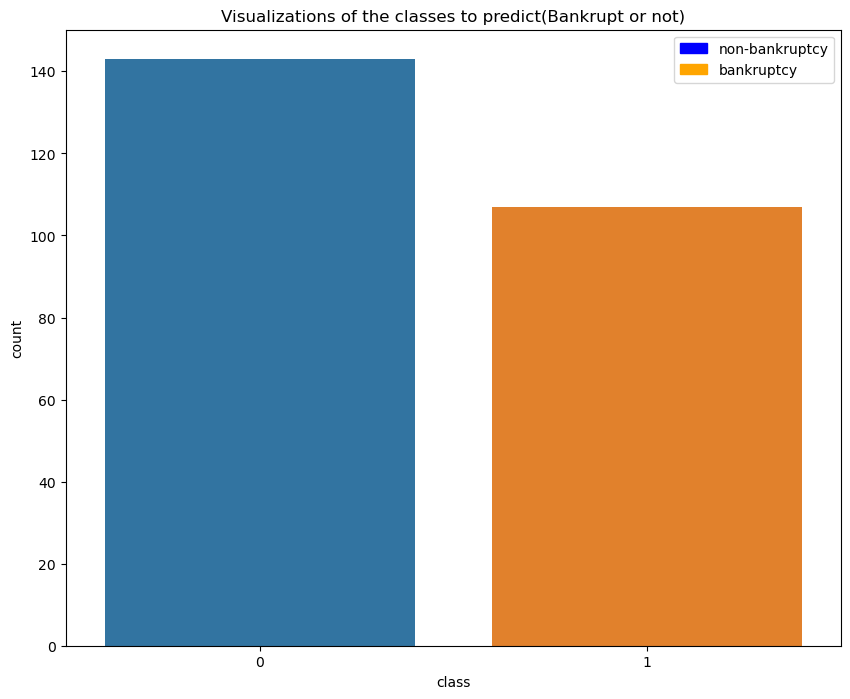

In [22]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
sns.countplot(x='class',data=bank_data)
plt.title('Visualizations of the classes to predict(Bankrupt or not)')

# Create legend handles
non_bankruptcy_patch = mpatches.Patch(color='blue', label='non-bankruptcy')
bankruptcy_patch = mpatches.Patch(color='orange', label='bankruptcy')

# Create custom legend
plt.legend(handles=[non_bankruptcy_patch, bankruptcy_patch])
plt.show()

In [23]:
col=bank_data.columns
col

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [24]:
len(col)

7

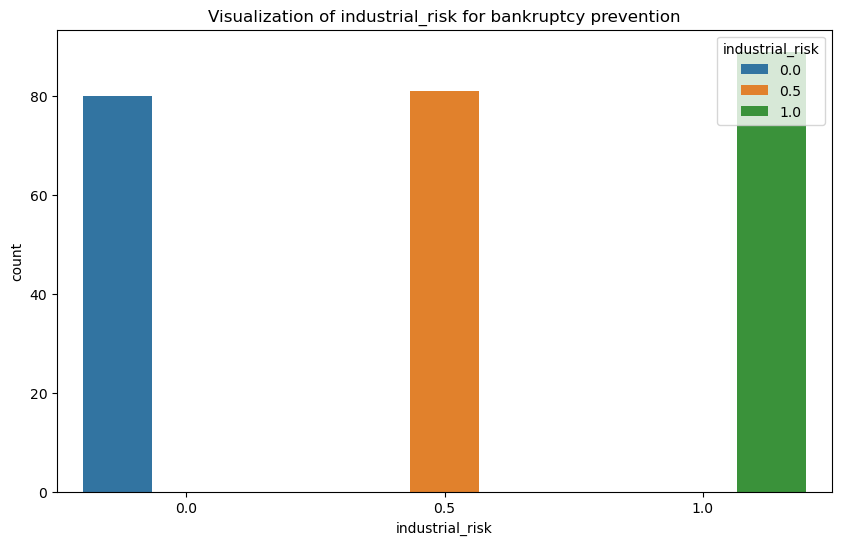

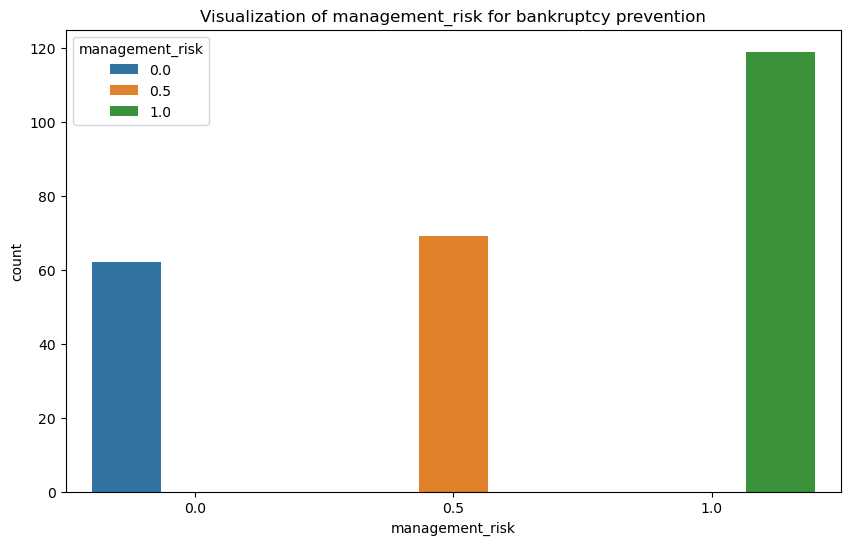

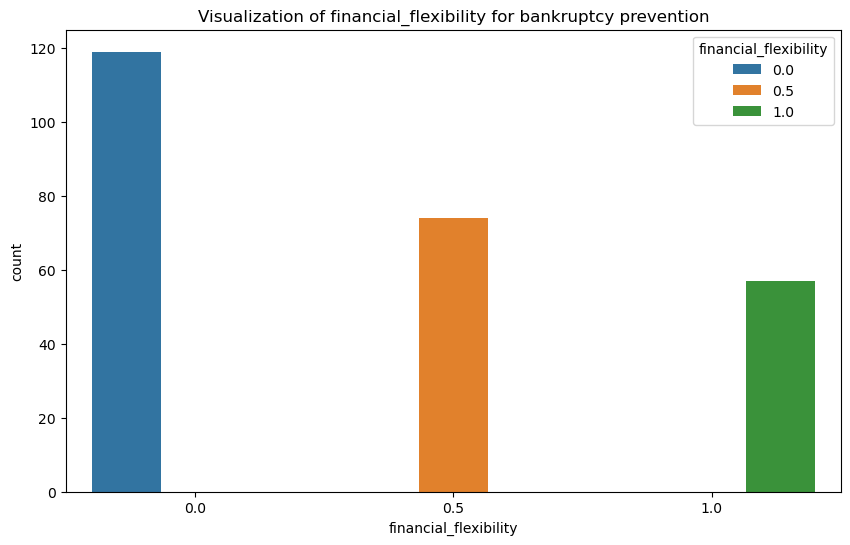

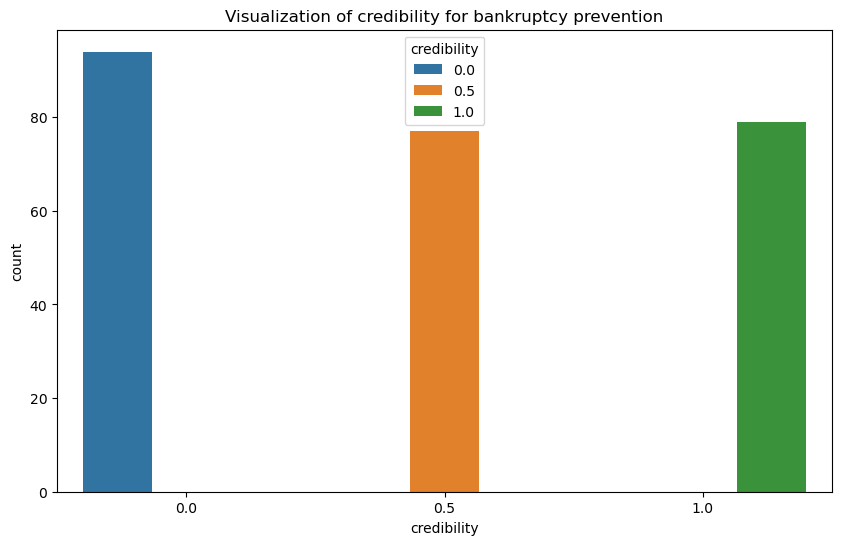

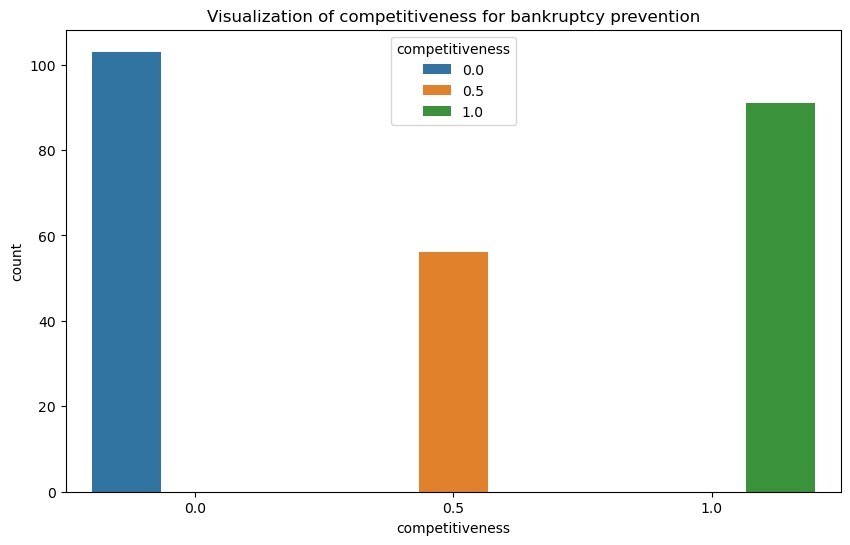

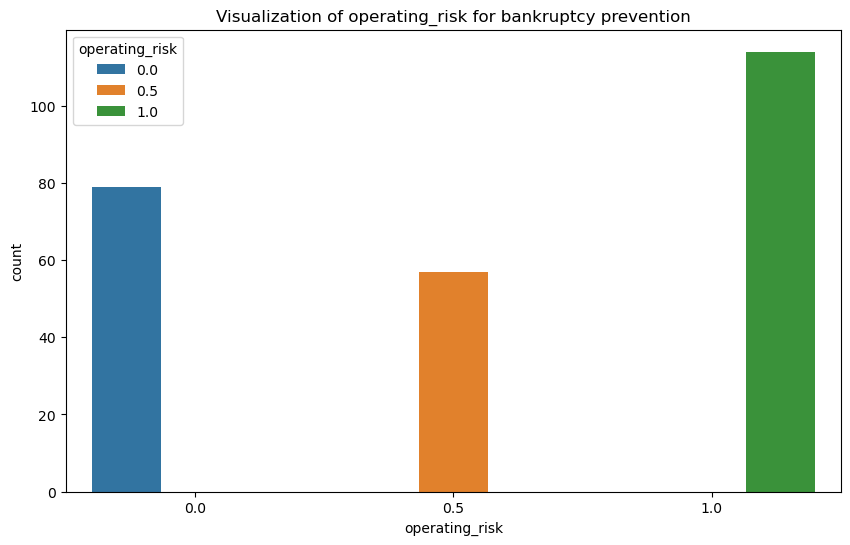

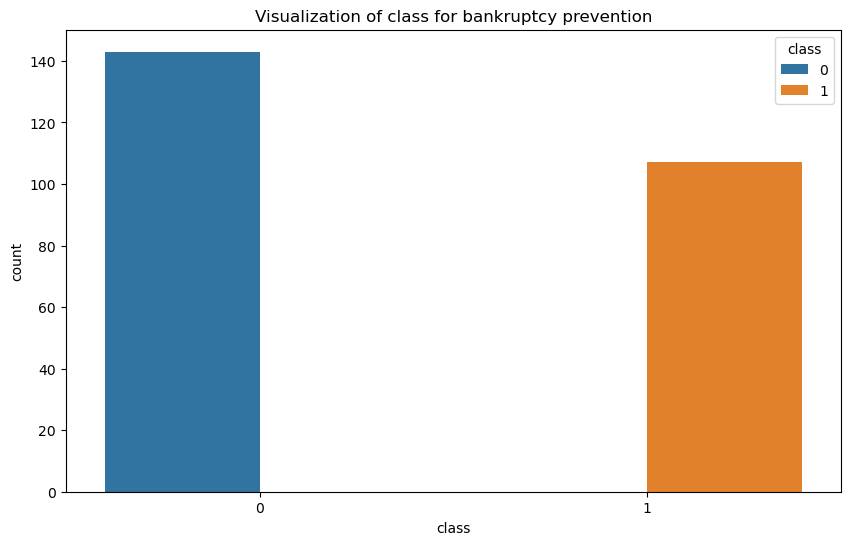

In [25]:
for i in range(0,len(col)):
    plt.figure(figsize=(10,6))
    sns.countplot(x=col[i],hue=col[i],data=bank_data)
    plt.title('Visualization of {} for bankruptcy prevention'.format(col[i]))
    plt.show()

In [26]:
bank_data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


#### This help us to understand the balance of the dataset and the proportion of the banks that have gone bankrupt. We can see from the plot that the count of non-bankruptcy is more in number than the bankruptcy.

### 2. Pairplot

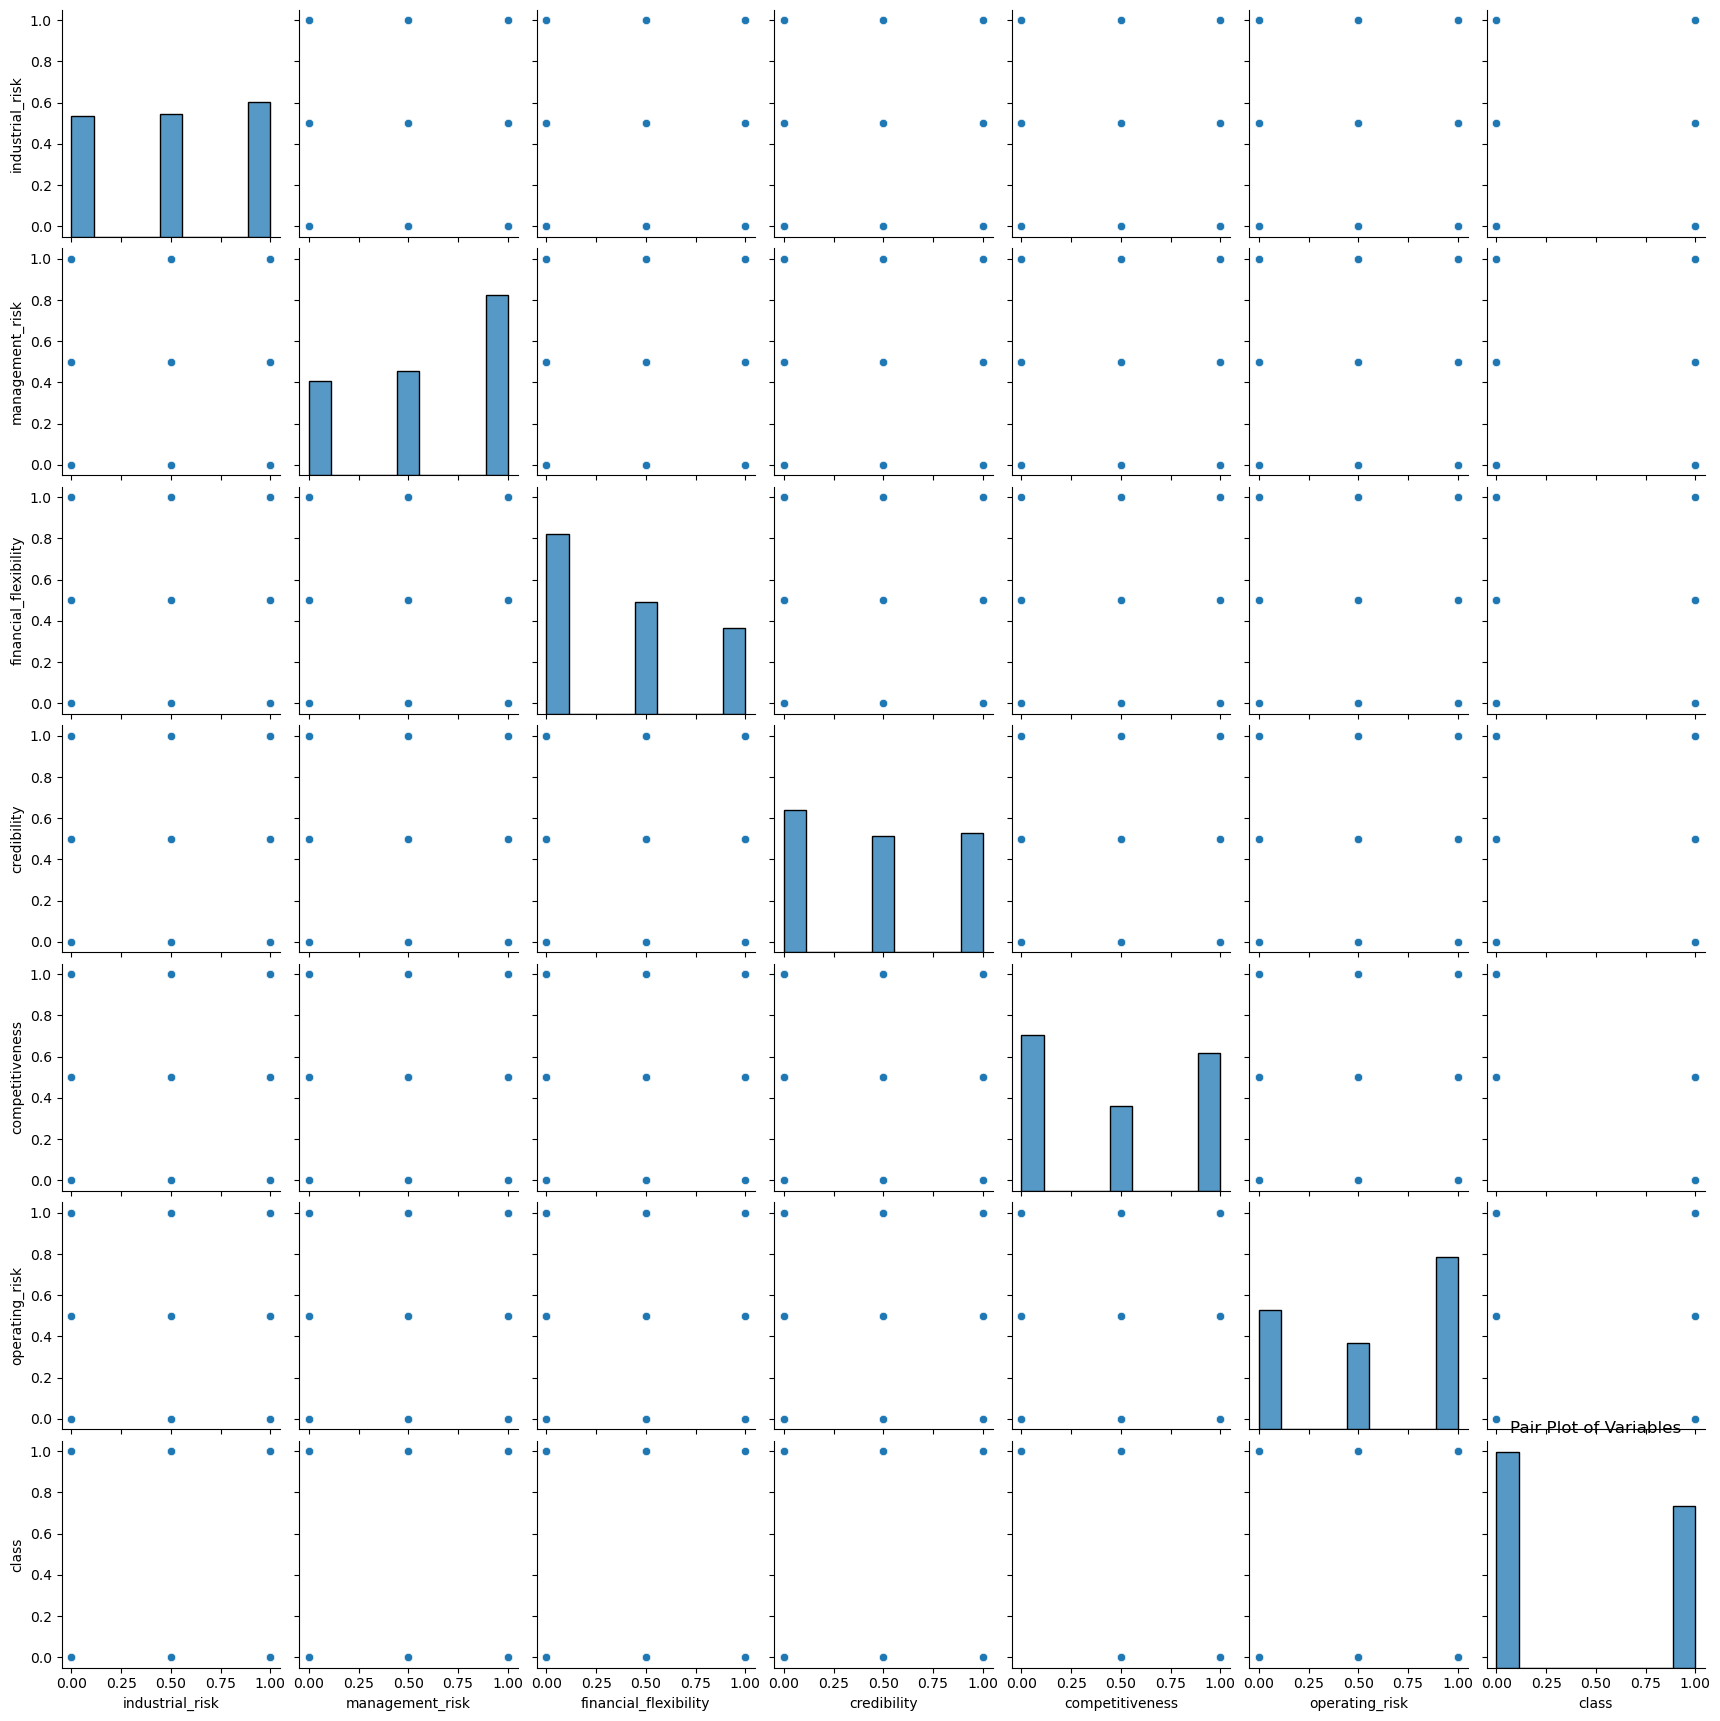

In [27]:
sns.pairplot(bank_data)
plt.title('Pair Plot of Variables')
plt.show()

In [28]:
col=bank_data.columns
col[:-1]

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

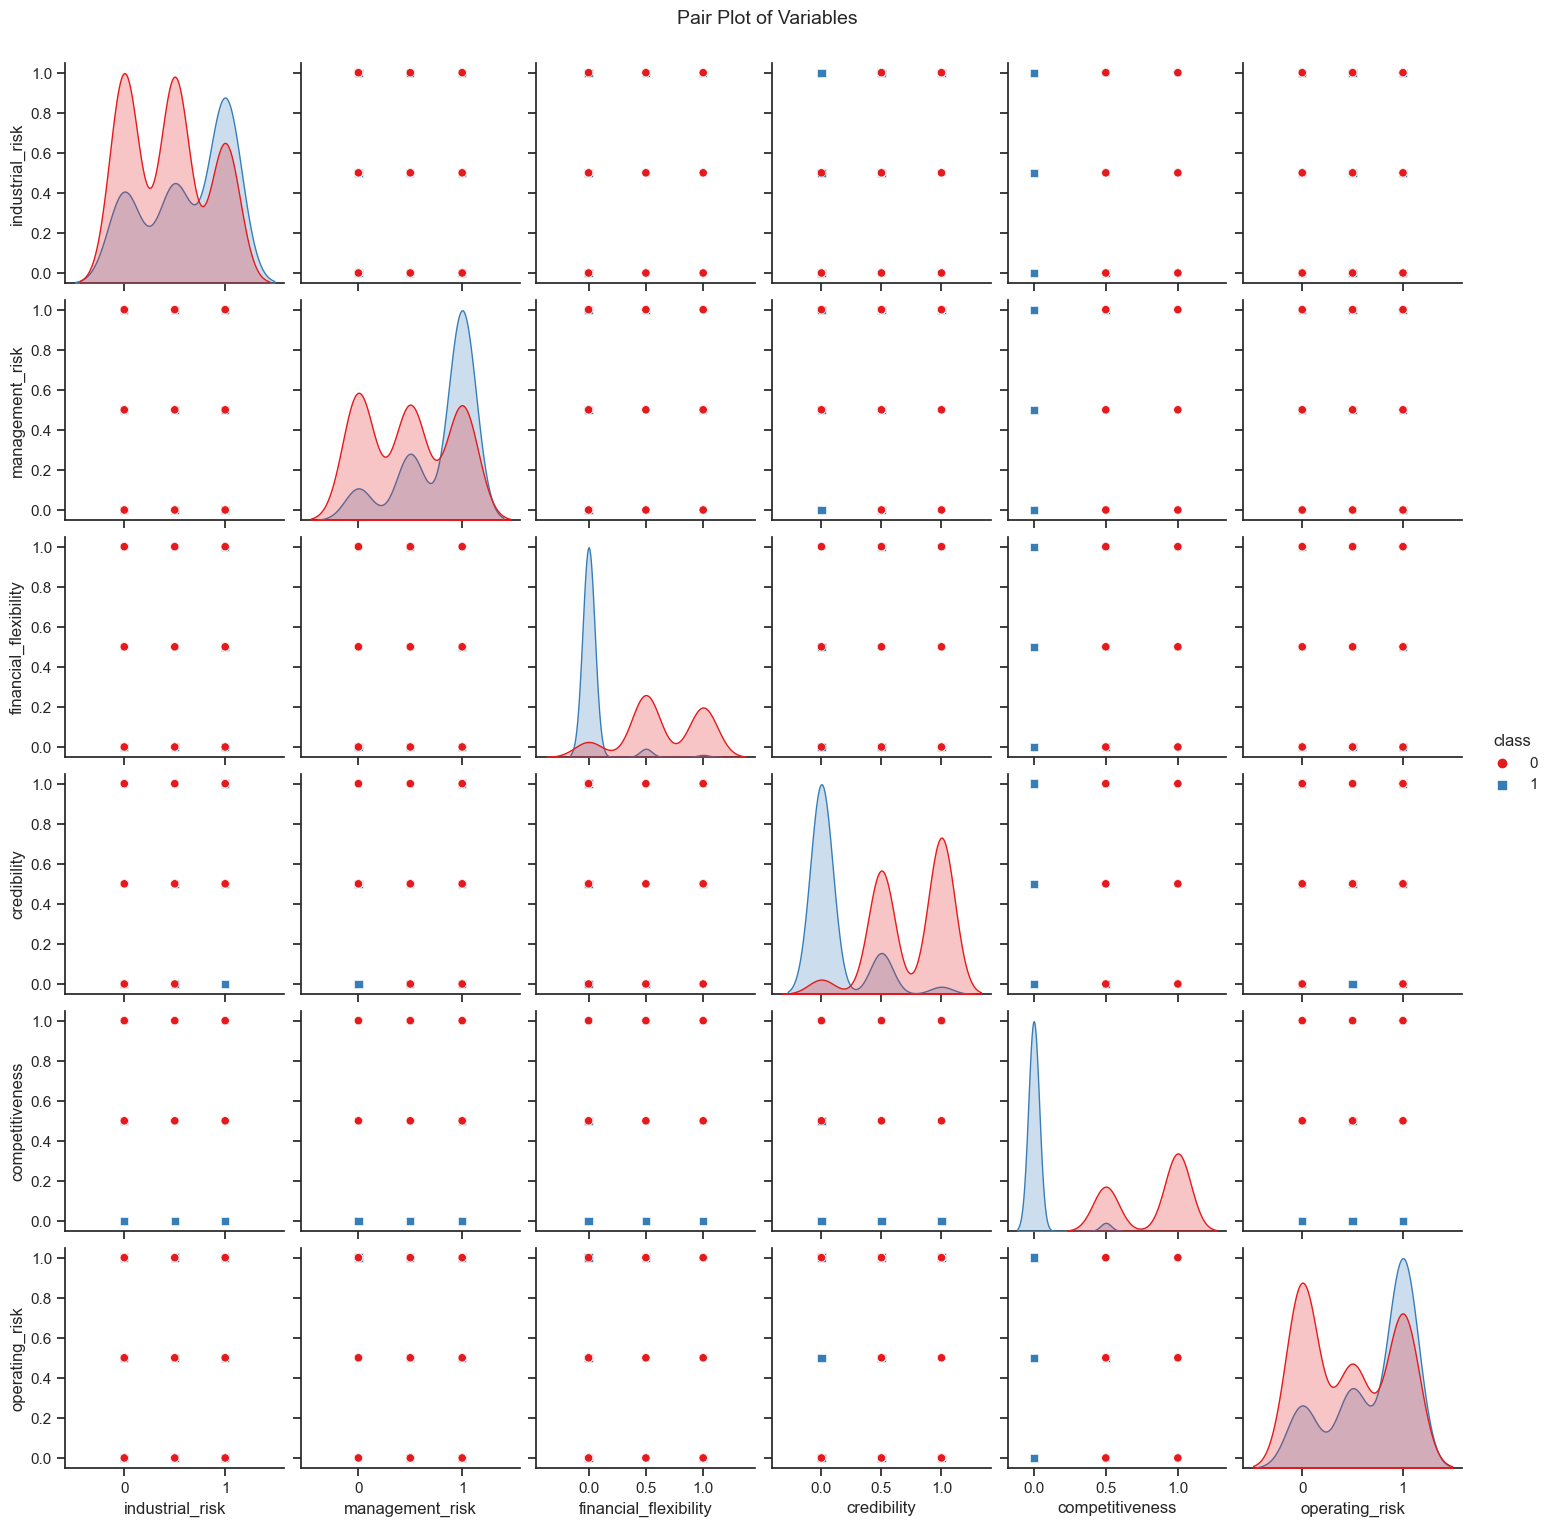

In [29]:
# Customize the pair plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=bank_data, vars=col[:-1], hue="class",
                 diag_kind="kde", markers=["o", "s"], palette="Set1")
# Add a title
plt.suptitle("Pair Plot of Variables", y=1.02, fontsize=14)
# Remove the top and right spines from each plot
sns.despine()
plt.show()

# 3. Histplot

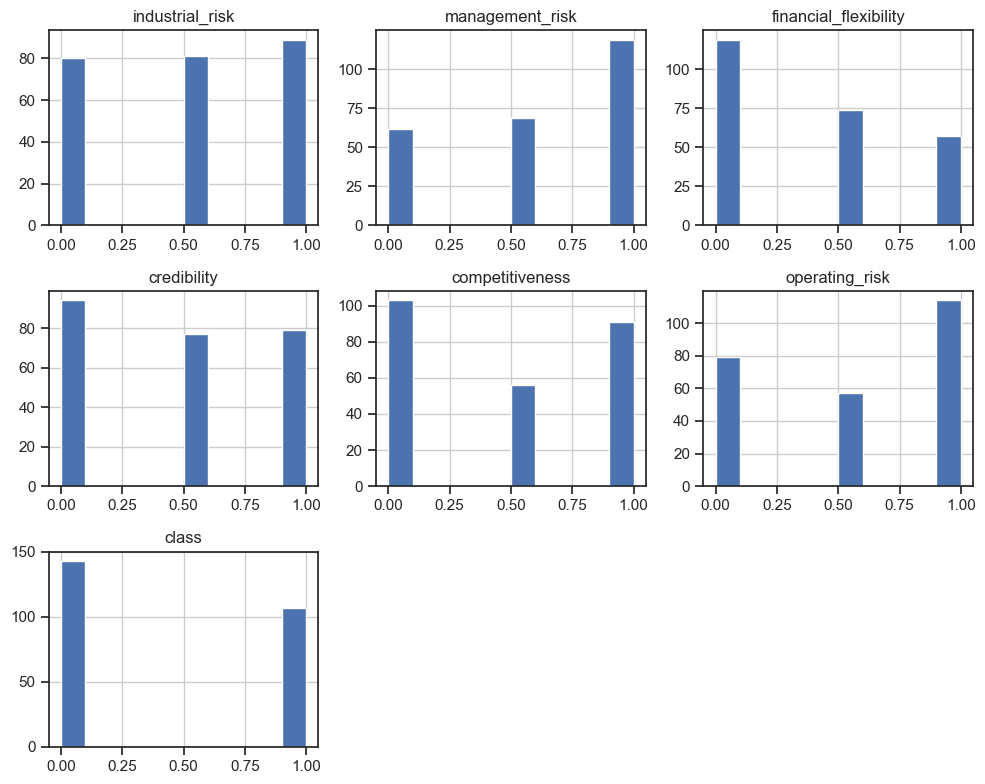

In [30]:
bank_data.hist(figsize=(10,8))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

### From the histogram plot of all the variables in the dataframe, it is essentially same as the countplot which shows the count or frequecy of occurency of each variable.

C:\Users\bhara\AppData\Local\Temp\ipykernel_1408\123481664.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[i],kde=True,hist=True,label=i)
C:\Users\bhara\AppData\Local\Temp\ipykernel_1408\123481664.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[i],kde=True,hist=True,l

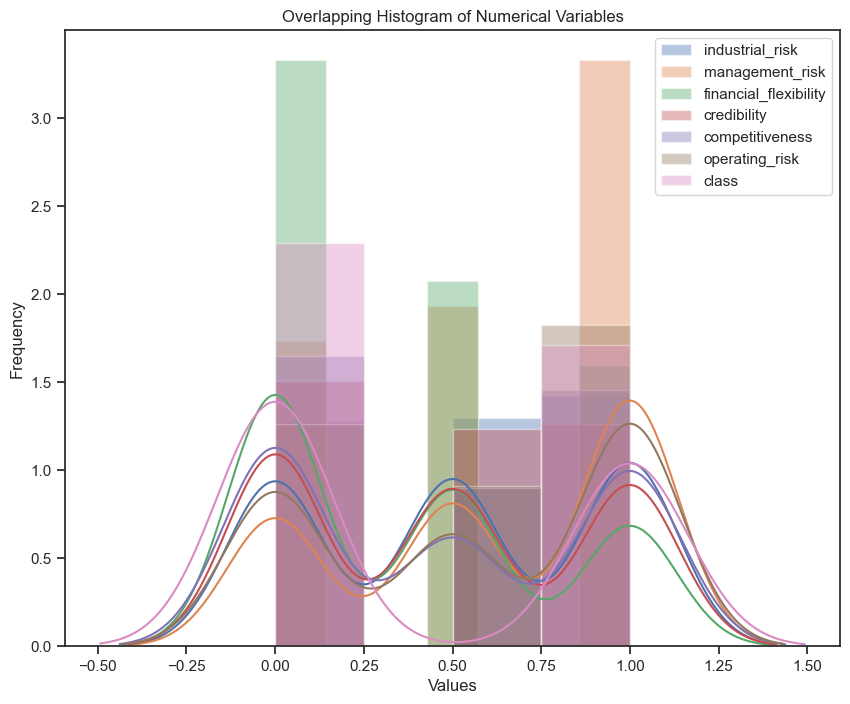

In [31]:
plt.figure(figsize=(10,8))
for i in col:
    sns.distplot(bank_data[i],kde=True,hist=True,label=i)
plt.title('Overlapping Histogram of Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### From the distribution plot, it can be verified that all the columns in the dataset follows the gaussian distribution where the peak of  individual variable distribution happen around either 0 or 0.5 or 1.

### 4. Box Plots

In [32]:
numerical_cols = bank_data.select_dtypes(include='float64').columns
numerical_cols

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

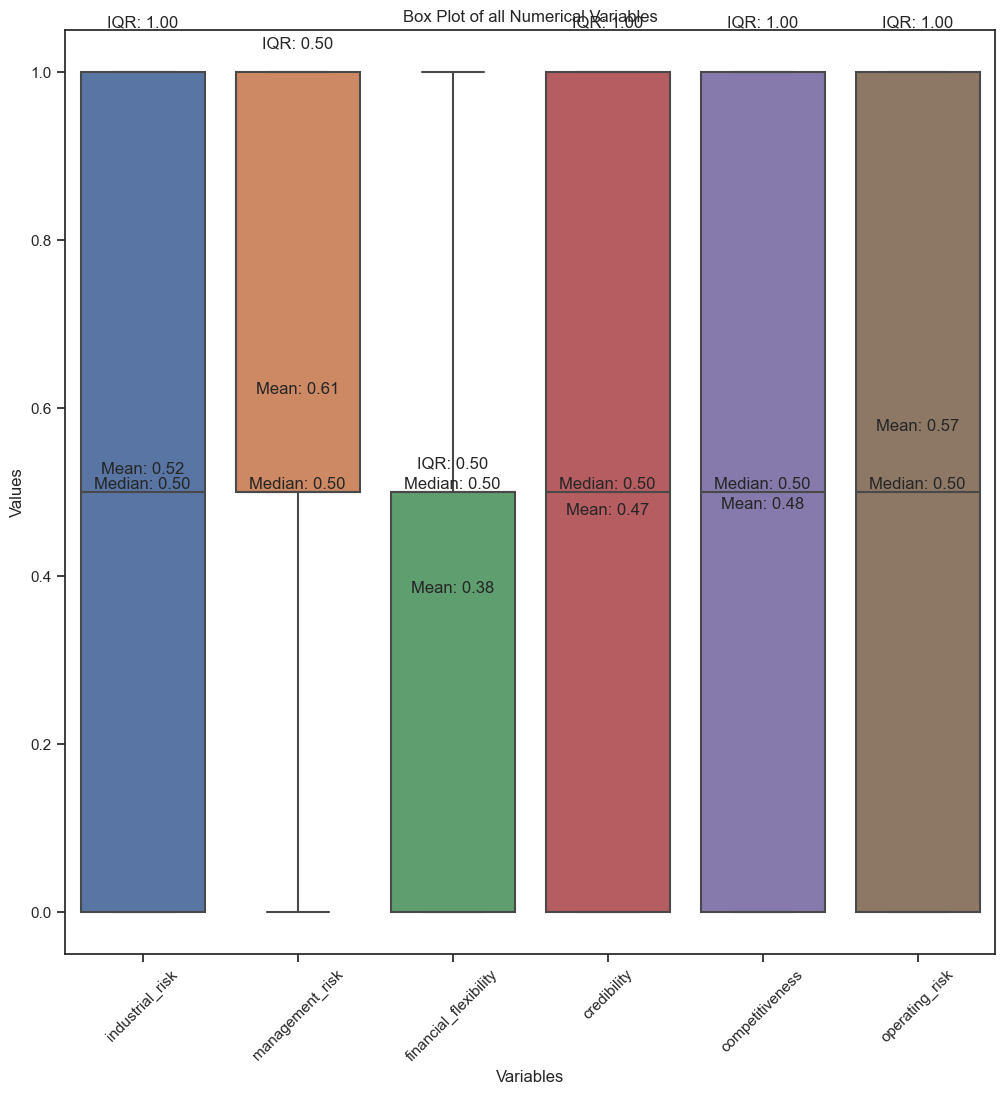

In [33]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=bank_data[numerical_cols])
plt.title('Box Plot of all Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Add mean, median, and IQR annotations
for col in numerical_cols:
    mean = np.mean(bank_data[col])
    median = np.median(bank_data[col])
    q1 = np.percentile(bank_data[col], 25)
    q3 = np.percentile(bank_data[col], 75)
    iqr = q3 - q1
    
    plt.text(numerical_cols.get_loc(col), mean, f'Mean: {mean:.2f}', ha='center', va='bottom')
    plt.text(numerical_cols.get_loc(col), median, f'Median: {median:.2f}', ha='center', va='bottom')
    plt.text(numerical_cols.get_loc(col), q3 + 0.05*iqr, f'IQR: {iqr:.2f}', ha='center', va='bottom')

plt.show()

### For all the individual variables, we have indicated the mean, median and IQR (Inter-Quartile Range) on the boxplot for clarity using the horizontal alignment (ha) and vertical alignment (va).

C:\Users\bhara\anaconda3\lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\bhara\anaconda3\lib\site-packages\seaborn\categorical.py:3544:

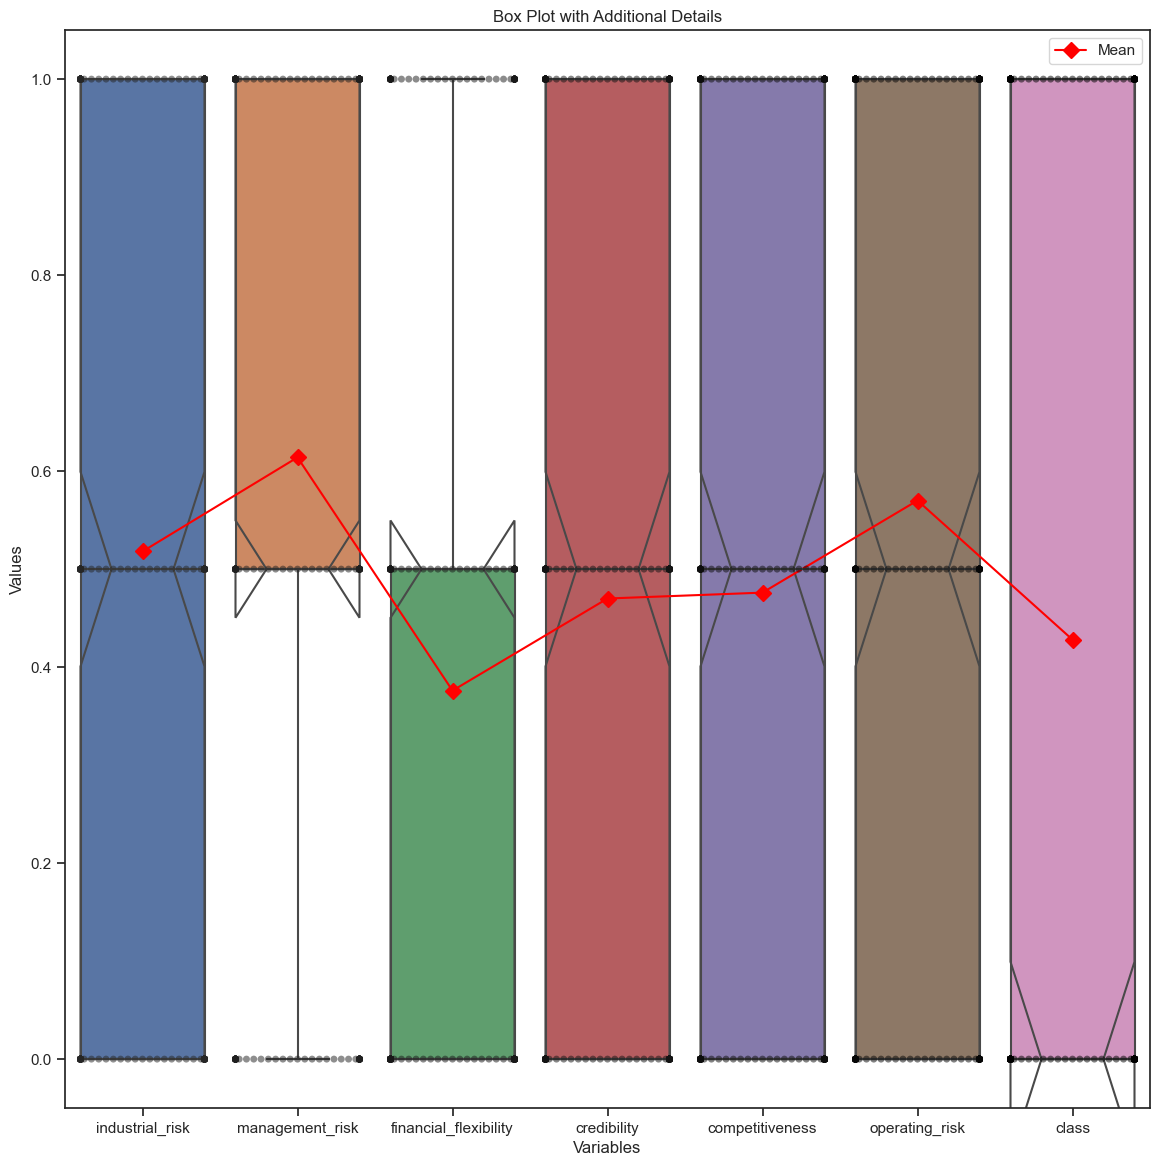

In [34]:
plt.figure(figsize=(14,14))
sns.boxplot(data=bank_data)
sns.swarmplot(data=bank_data, color='black', alpha=0.5)  # Add swarmplot for individual data points
plt.title('Box Plot with Additional Details')
plt.xlabel('Variables')
plt.ylabel('Values')

# Add mean as a red diamond marker
mean_values = bank_data.mean().values
plt.plot(mean_values, marker='D', color='red', markersize=8, label='Mean')

# Add notches to the boxes
sns.boxplot(data=bank_data, notch=True, boxprops={'facecolor': 'None'}, whiskerprops={'linewidth': 0})

# Add legend
plt.legend()

# Show the plot
plt.show()

### 5. Correlation Heatmap

In [35]:
corr_mat=bank_data.corr()
print(corr_mat)

                       industrial_risk  management_risk  \
industrial_risk               1.000000         0.255127   
management_risk               0.255127         1.000000   
financial_flexibility        -0.162624        -0.254845   
credibility                  -0.014438        -0.303341   
competitiveness              -0.257814        -0.306568   
operating_risk                0.144507         0.213874   
class                         0.227823         0.370838   

                       financial_flexibility  credibility  competitiveness  \
industrial_risk                    -0.162624    -0.014438        -0.257814   
management_risk                    -0.254845    -0.303341        -0.306568   
financial_flexibility               1.000000     0.524951         0.686612   
credibility                         0.524951     1.000000         0.675689   
competitiveness                     0.686612     0.675689         1.000000   
operating_risk                     -0.116903    -0.288458  

In [36]:
corr_mat.shape

(7, 7)

#### Fom the correlation matrix, we have a 7 by  7 matrix with element in the matrix represents the correlation coefficient between two variables. The values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

In [37]:
# Find the maximum correlation value and corresponding columns
max_corr = corr_mat.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
max_corr_columns = corr_mat[corr_mat == max_corr].stack().index.tolist()

In [38]:
min_corr=corr_mat.unstack().sort_values().drop_duplicates().iloc[0]
min_corr_columns = corr_mat[corr_mat == min_corr].stack().index.tolist()

In [39]:
print("Maximum correlation:", max_corr)
print("Columns with maximum correlation:", max_corr_columns)

Maximum correlation: 0.6866115492516397
Columns with maximum correlation: [('financial_flexibility', 'competitiveness'), ('competitiveness', 'financial_flexibility')]


#### This indicates that the columns ('financial_flexibility', 'competitivceness') are correlated in the positive direction.

In [40]:
print("Minimum correlation:", min_corr)
print("Columns with minimum correlation:", min_corr_columns)

Minimum correlation: -0.8994517671137839
Columns with minimum correlation: [('competitiveness', 'class'), ('class', 'competitiveness')]


#### This indicates that the columns ('competitiveness', 'class') are correlated in the negative direction.

#### The 'class' column is the output variable

In [41]:
corr_out= corr_mat['class'].drop('class')

print("Correlation with output variable:")
print(corr_out)

Correlation with output variable:
industrial_risk          0.227823
management_risk          0.370838
financial_flexibility   -0.751020
credibility             -0.755909
competitiveness         -0.899452
operating_risk           0.279786
Name: class, dtype: float64


In [42]:
max_corr_value = corr_mat['class'].drop('class').max()
max_corr_column = corr_mat['class'].drop('class').idxmax()

print("Maximum correlation value:", max_corr_value)
print("Column with maximum correlation with output variable {CLASS}:", max_corr_column)

Maximum correlation value: 0.370838085064343
Column with maximum correlation with output variable {CLASS}: management_risk


In [43]:
min_corr_value = corr_mat['class'].drop('class').min()
min_corr_column = corr_mat['class'].drop('class').idxmin()

print("Minimum correlation value:", min_corr_value)
print("Column with minimum correlation with output variable {CLASS}:", min_corr_column)

Minimum correlation value: -0.8994517671137839
Column with minimum correlation with output variable {CLASS}: competitiveness


### From the above analysis, we have performed the following:
### 1. We obtained the correlation between all the pair of variables in the dataframe.
### 2. Then with respect to the output variable "class" found the corresponding columns that are correlated in a maximum and minimum manner.

#### Plotting the correlation matrix

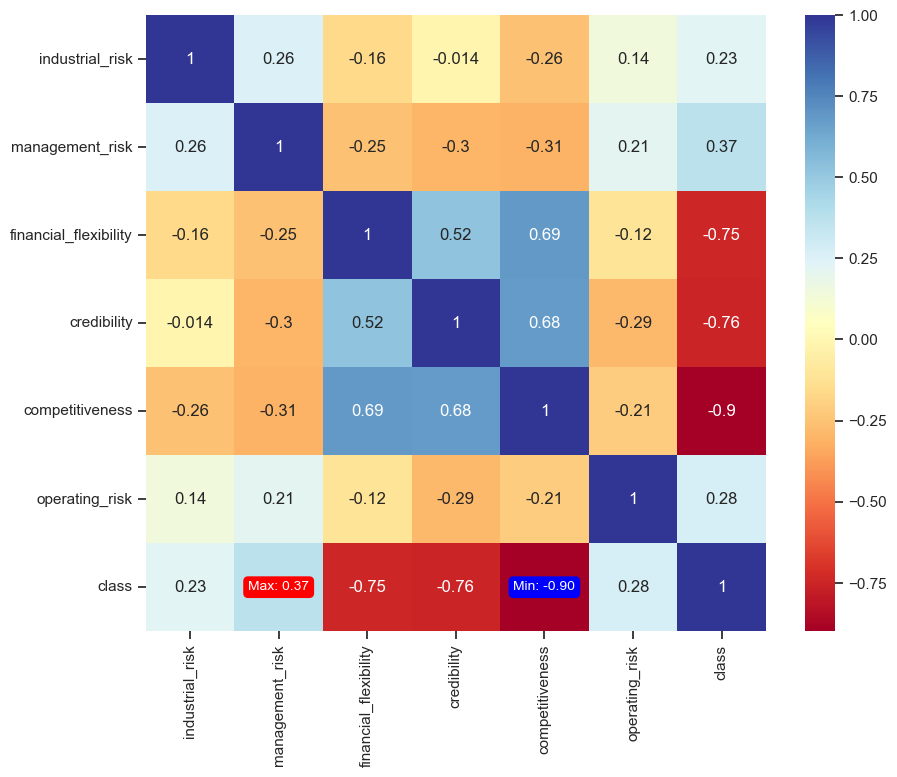

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='RdYlBu')

# Highlight maximum correlation value and its column
plt.text(corr_mat.columns.get_loc(max_corr_column) + 0.5,
         corr_mat.columns.get_loc('class') + 0.5,
         f"Max: {max_corr_value:.2f}",
         ha='center', va='center', color='white', fontsize=10,
         bbox=dict(facecolor='red', edgecolor='red', boxstyle='round,pad=0.3'))

# Highlight minimum correlation value and its column
plt.text(corr_mat.columns.get_loc(min_corr_column) + 0.5,
         corr_mat.columns.get_loc('class') + 0.5,
         f"Min: {min_corr_value:.2f}",
         ha='center', va='center', color='white', fontsize=10,
         bbox=dict(facecolor='blue', edgecolor='blue', boxstyle='round,pad=0.3'))
plt.show()

C:\Users\bhara\AppData\Local\Temp\ipykernel_1408\481107603.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


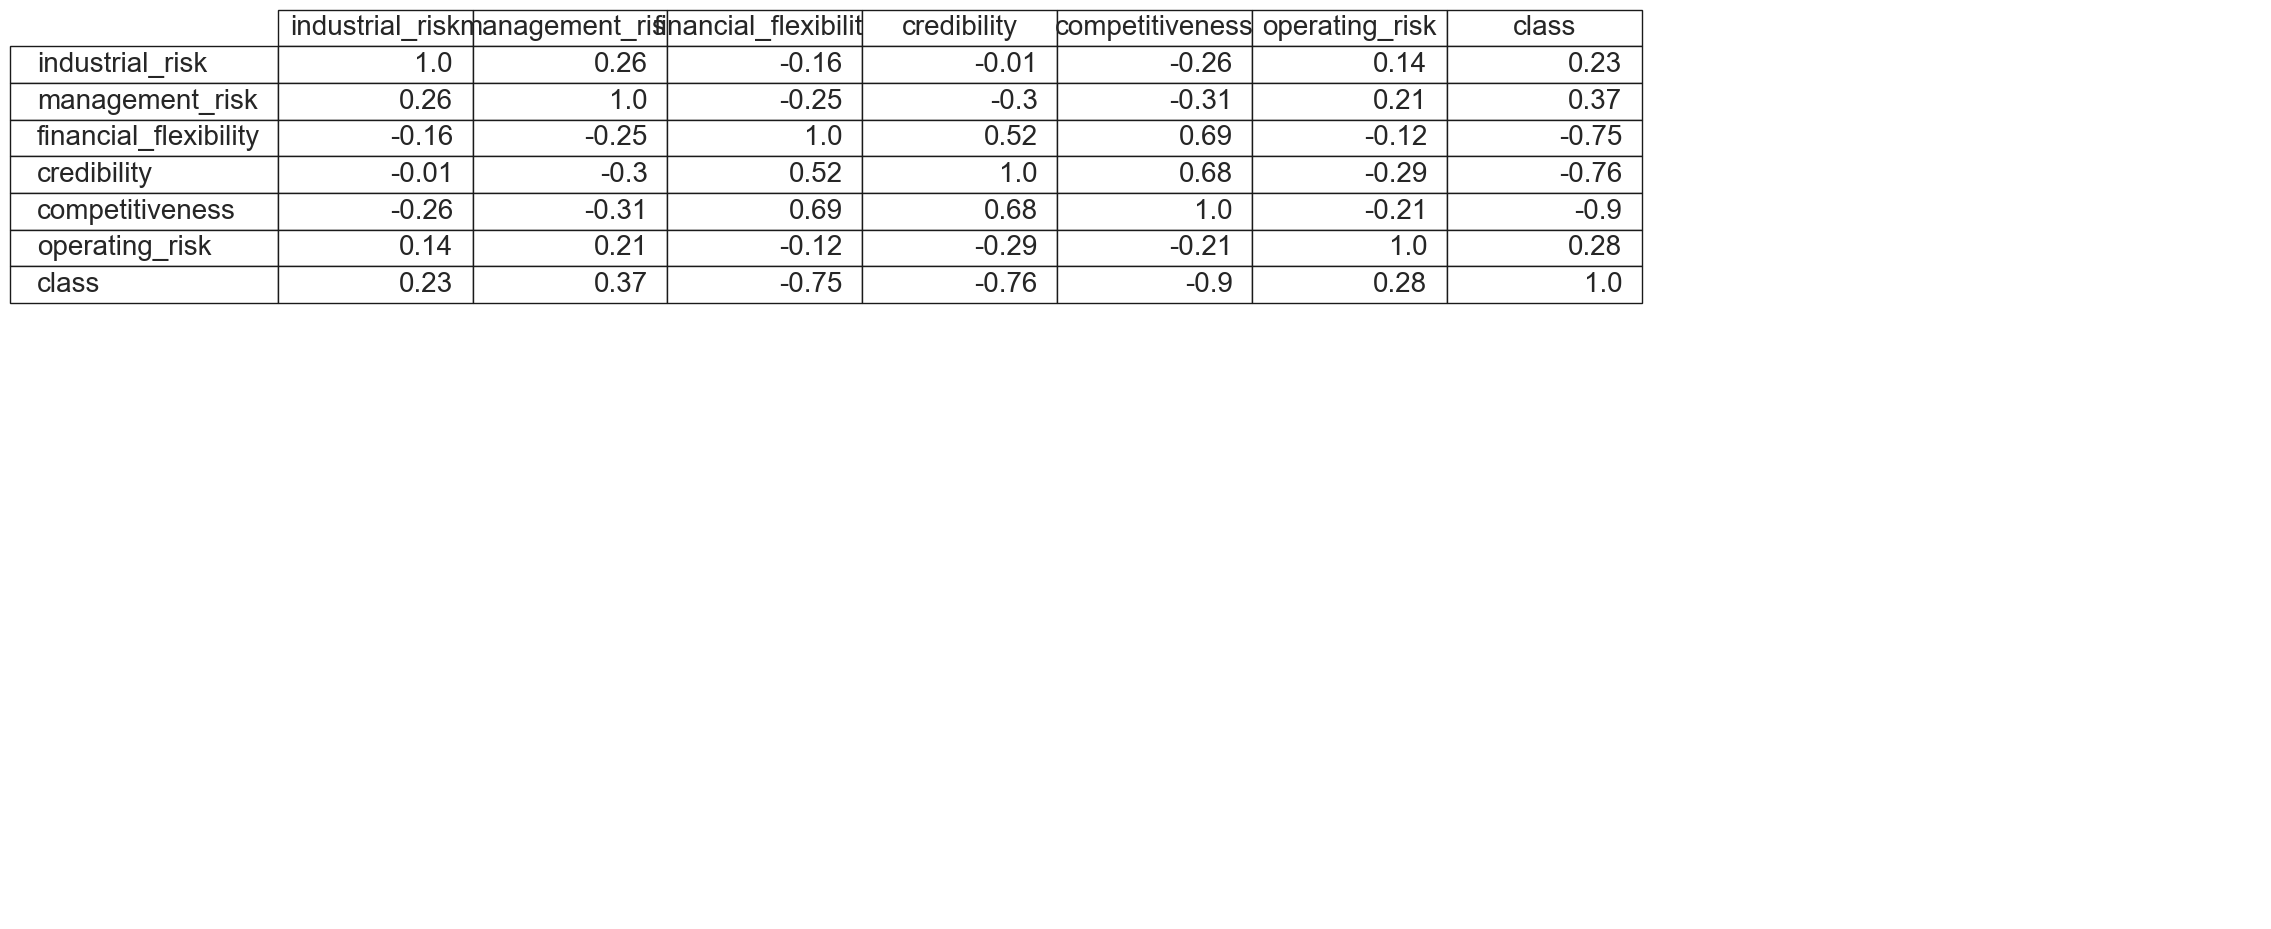

In [45]:
# Create the correlation table
corr_table = pd.DataFrame(corr_mat)
corr_table.index.name = 'Variable 1'
corr_table.columns.name = 'Variable 2'

# Plot the correlation table as a table
fig, ax = plt.subplots(figsize=(8,8))
table = ax.table(cellText=np.round(corr_table.values, 2), colLabels=corr_table.columns, rowLabels=corr_table.index,
                 loc='top left')

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(2.2, 2.2)

# Remove axis labels and ticks
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
# Separating X and y
X = bank_data.drop('class', axis=1)
y = bank_data['class']

In [47]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
#displaying Train set
X_train

Variable 2,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
163,0.5,0.0,1.0,1.0,1.0,0.0
45,0.0,1.0,0.0,0.0,0.0,1.0
51,1.0,1.0,0.0,0.0,0.0,0.5
144,0.5,1.0,0.5,1.0,1.0,0.5
145,0.5,0.0,1.0,0.5,0.5,0.5
...,...,...,...,...,...,...
116,0.0,0.0,0.5,0.5,1.0,0.0
187,0.0,0.5,0.5,0.5,1.0,0.5
170,0.5,1.0,0.0,1.0,1.0,0.5
249,1.0,0.0,0.5,0.5,1.0,1.0


In [49]:
#displaying Test set
X_test

Variable 2,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
185,0.0,0.5,0.0,0.5,1.0,0.5
196,0.5,0.5,0.5,1.0,1.0,0.5
150,0.5,0.0,1.0,0.5,1.0,1.0
15,0.5,1.0,0.0,0.0,0.0,0.5
216,1.0,1.0,0.5,0.5,0.5,1.0
136,1.0,0.0,1.0,1.0,1.0,1.0
38,1.0,1.0,0.0,0.5,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
69,0.0,1.0,0.0,0.0,0.0,1.0
172,0.5,0.5,0.0,1.0,1.0,0.0


# Feature Engineering
1. Univariate Feature Selection

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [51]:
# apply SelectKBest class to extract top 6 best features

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X, y)

featureScores_univ = pd.DataFrame({'variables':X.columns, 'Score':fit.scores_})
featureScores_univ.sort_values(by=['Score'], ascending=False)

,variables,Score
4,competitiveness,82.186252
2,financial_flexibility,60.237242
3,credibility,52.307251
1,management_risk,9.407190
5,operating_risk,6.458129
0,industrial_risk,4.225298


High chi2 value suggest, feature is useful in predicting the class variable

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import DecisionTreeClassifier
import matplotlib.pyplot as plt

[0.01670091 0.02683748 0.24595509 0.19704443 0.49559985 0.01786224]


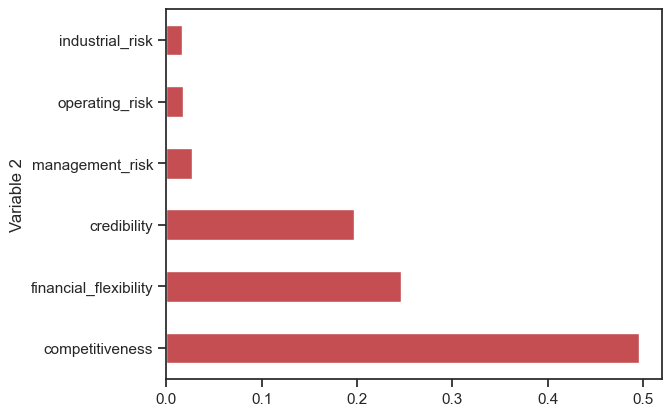

In [53]:
# use inbuilt class feature_importances of tree based classifiers
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh', color='r')
plt.show()


In [54]:
#Feature Engineering
#1. Univariate Feature Selection

In [55]:
featureScores_dt = pd.DataFrame({'variables':X.columns, 'Score':model.feature_importances_})
featureScores_dt.sort_values(by=['Score'], ascending=False)



,variables,Score
4,competitiveness,0.495600
2,financial_flexibility,0.245955
3,credibility,0.197044
1,management_risk,0.026837
5,operating_risk,0.017862
0,industrial_risk,0.016701


In [56]:
# droping industrial_risk and operating_risk
X.drop(['industrial_risk','operating_risk'],axis=1,inplace=True)
X.head()

Variable 2,management_risk,financial_flexibility,credibility,competitiveness
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.5,0.0
4,1.0,0.0,0.0,0.0


# 1. Random Forest Classification


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [58]:
#train, test = train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [59]:
num_trees = 10
# max features: sqrt(n_features)
max_features = 3

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_RFC = cross_val_score(model_RFC, X, y, cv=kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_RFC}')
print(f'Average score: {"{:.2f}".format(results_RFC.mean())}')

Scores for each fold are: [0.98 1.   0.98 1.   1.  ]
Average score: 0.99


In [60]:
# model fit and validate
model_RFC.fit(X_train, y_train)
preds = model_RFC.predict(X_test)
print("Training Accuracy: ", model_RFC.score(X_train, y_train))
print('Testing Accuarcy: ', model_RFC.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [61]:
print('Classification report for Random Forest model')
f1_rfc = f1_score(y_test, preds)
precision_rfc = precision_score(y_test, preds)
recall_rfc = recall_score(y_test, preds)

print('F1 is: ', f1_rfc)
print('Precision is: ', precision_rfc)
print('Recall is: ', recall_rfc)

Classification report for Random Forest model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# 2. Logistic Regression


In [62]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_LR = LogisticRegression(random_state= 42)
results_LR = cross_val_score(model_LR, X, y, cv= kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_LR}')
print(f'Average score: {"{:.2f}".format(results_LR.mean())}')

Scores for each fold are: [0.98 1.   1.   0.98 1.  ]
Average score: 0.99


In [63]:
# model fit and validate

model_LR.fit(X_train, y_train)
preds = model_LR.predict(X_test)
print("Training Accuracy: ", model_LR.score(X_train, y_train))
print('Testing Accuarcy: ', model_LR.score(X_test, y_test))

Training Accuracy:  0.9942857142857143
Testing Accuarcy:  0.9866666666666667


In [64]:
print('Classification report for Logistic Regression model')
f1_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)

print('F1 is: ', f1_LR)
print('Precision is: ', precision_LR)
print('Recall is: ', recall_LR)

Classification report for Logistic Regression model
F1 is:  0.9803921568627451
Precision is:  0.9615384615384616
Recall is:  1.0


# 3. AdaBoost Classification


In [65]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed = 7

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
model_AdB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_AdB = cross_val_score(model_AdB, X, y, cv=kfold, scoring="accuracy")

print(results_AdB.mean())

0.992


In [66]:
# model fit and validate

model_AdB.fit(X_train, y_train)
preds = model_AdB.predict(X_test)
print("Training Accuracy: ", model_AdB.score(X_train, y_train))
print('Testing Accuarcy: ', model_AdB.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [67]:
f1_adb = f1_score(y_test, preds)
precision_adb = precision_score(y_test, preds)
recall_adb = recall_score(y_test, preds)

print('F1 is: ', f1_adb)
print('Precision is: ', precision_adb)
print('Recall is: ', recall_adb)

F1 is:  0.9803921568627451
Precision is:  0.9615384615384616
Recall is:  1.0


# 4. K Nearest Neighbour


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Grid Search for Algorithm Tuning

n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [69]:
print(grid.best_score_)
print(grid.best_params_)

0.9960000000000001
{'n_neighbors': 8}


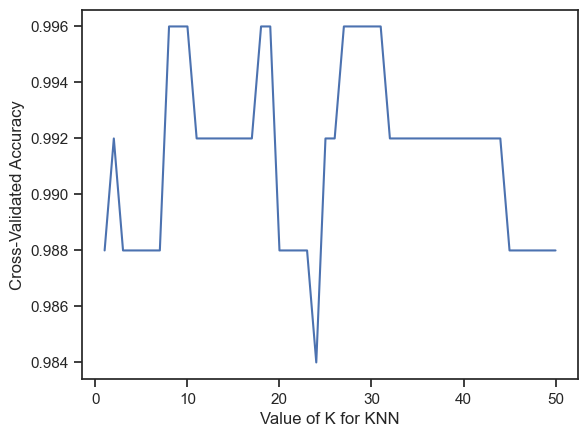

In [70]:
# Visualizing the CV results

k_range = range(1, 51)
k_scores = []

# Use iteration to caclulator different K in models, 
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
    
# Plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [71]:
# Model with tuned parameters, balanced data

model_KNN = KNeighborsClassifier(n_neighbors=1)
results_KNN = cross_val_score(model_KNN, X, y, cv=kfold, scoring="accuracy")

print(results_KNN.mean())

0.9879999999999999


In [72]:
model_KNN.fit(X_train, y_train)
preds = model_KNN.predict(X_test)
print("Training Accuracy: ", model_KNN.score(X_train, y_train))
print('Testing Accuarcy: ', model_KNN.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [73]:
print('Classification report for K Nearest Neighbour model')
f1_KNN = f1_score(y_test, preds)
precision_KNN = precision_score(y_test, preds)
recall_KNN = recall_score(y_test, preds)

print('F1 is: ', f1_KNN)
print('Precision is: ', precision_KNN)
print('Recall is: ', recall_KNN)

Classification report for K Nearest Neighbour model
F1 is:  0.9803921568627451
Precision is:  0.9615384615384616
Recall is:  1.0


# 5. Support Vector Machine (SVM) Classifier


In [74]:
from sklearn import svm

# Grid Search/hyper parameter Tuning

model = svm.SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,10,0.1,0.001] }]
gsv = GridSearchCV(model, param_grid, cv=5)
gsv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [75]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9942857142857143)

In [76]:
gsv.best_params_ , gsv.best_score_ 


({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.9942857142857143)

In [77]:
# Model with parameters from grid search

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_SVM = svm.SVC(C= 15, gamma = 0.5)
results_SVM = cross_val_score(model_SVM, X, y, cv=kfold, scoring="accuracy")

print(results_SVM.mean())

0.992


In [78]:
model_SVM.fit(X_train, y_train)
preds = model_SVM.predict(X_test)
print("Training Accuracy: ", model_SVM.score(X_train, y_train))
print('Testing Accuarcy: ', model_SVM.score(X_test, y_test))

Training Accuracy:  1.0
Testing Accuarcy:  0.9866666666666667


In [79]:
print('Classification report for SVM model')
f1_SVM = f1_score(y_test, preds)
precision_SVM = precision_score(y_test, preds)
recall_SVM = recall_score(y_test, preds)

print('F1 is: ', f1_SVM)
print('Precision is: ', precision_SVM)
print('Recall is: ', recall_SVM)

Classification report for SVM model
F1 is:  0.9803921568627451
Precision is:  0.9615384615384616
Recall is:  1.0


In [80]:
# Storing results in a data frame

d1 = {'Models':['Random Forest','Ada Boost','Logistic Regression','KNN','SVM',], 
      'Accuracy':[results_RFC.mean(), results_AdB.mean(), results_LR.mean(), results_KNN.mean(), results_SVM.mean()],
     'F1_Score':[f1_rfc, f1_adb, f1_LR, f1_KNN, f1_SVM],
     'Precision':[precision_rfc, precision_adb, precision_LR, precision_KNN, precision_SVM],
     'Recall':[recall_rfc, recall_adb, recall_LR, recall_KNN, recall_SVM]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
0,Random Forest,0.992,1.000000,1.000000,1.0
1,Ada Boost,0.992,0.980392,0.961538,1.0
2,Logistic Regression,0.992,0.980392,0.961538,1.0
4,SVM,0.992,0.980392,0.961538,1.0
3,KNN,0.988,0.980392,0.961538,1.0


# Prediction using Random Forest


In [81]:
# Building a model on Random Foresst
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0])

In [83]:
## Taken data from data set 
t = clf.predict([[1.0, 0.0, 0.0, 0.0]])
print(t)

[1]


C:\Users\bhara\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
y_pred_df= pd.DataFrame({'actual': y_test, 'predicted_prob': clf.predict(X_test)})


In [85]:
y_pred_df.head(15)

,actual,predicted_prob
142,0,0
6,1,1
97,1,1
60,1,1
112,0,0
181,0,0
197,0,0
184,0,0
9,1,1
104,1,1


<Axes: xlabel='predicted_prob', ylabel='actual'>

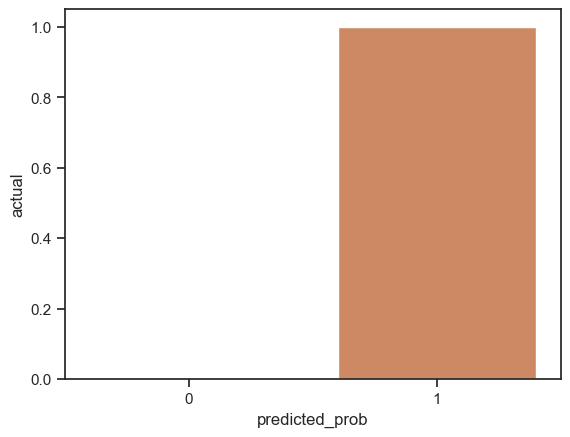

In [86]:
sns.barplot(y='actual',x='predicted_prob',data=y_pred_df)

# Evaluation

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [88]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


The resulting accuracy score is 0.986666667, 
which means that the random forest classifier achieved an accuracy of approximately 98.66%. 

In [89]:
# Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[50  0]
 [ 0 25]]


49 TN and 25 TP Values predicted
1 false Positiive
No false Negatives


In [90]:
# Precision

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 1.0


The model has high Prediction Value

In [91]:
# Recall

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


Recall score indicates all the Positives are identified without any false negatives

In [92]:
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 1.0


This indicates that the model is performing well in terms of both identifying positive instances and avoiding false positives.

In [93]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        25

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



The classification report demonstrates that the model has achieved high precision, recall, and F1-score for both classes, indicating its effectiveness in correctly classifying instances in the dataset.

In [94]:
# ROC AUC Score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


The model can distinguish between the positive and negative classes with precision, with a very low rate of errors.

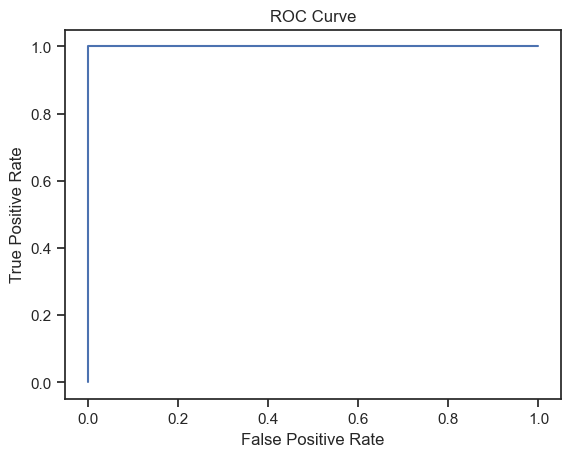

In [95]:
## ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The graph shows the model has excellent prediction accuracy

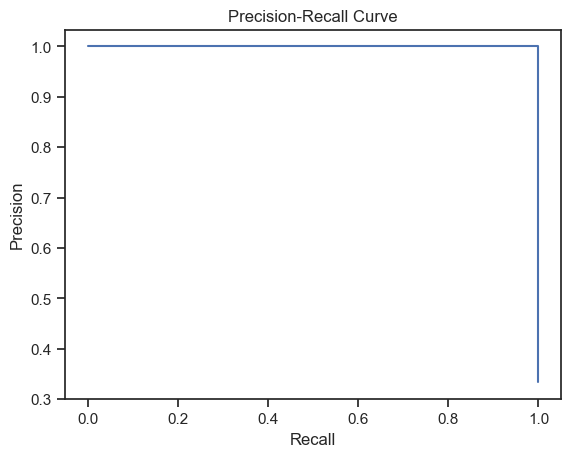

In [96]:
## Precision Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Creating a Dataframe of all the results

In [97]:
accuracy_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],'Score': [accuracy, precision, recall, f1, roc_auc]})

In [98]:
accuracy_df

,Metric,Score
0,Accuracy,1.0
1,Precision,"[0.3333333333333333, 1.0, 1.0]"
2,Recall,"[1.0, 1.0, 0.0]"
3,F1 Score,1.0
4,ROC AUC,1.0
